In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import joblib
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from sklearn.metrics import mean_squared_error
#import tensorflow as tf
import imblearn
import csv
import os
import os.path
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [30]:
user=os.getlogin()
df = read_csv('/home/'+user+'/Documents/Axiado-USB-Works/Reports/MLmodelanalysisofsmartattacksusingdifferenttechniques-allrelatedfiles/smartattack3_usingadjustedfeaturesofbenigndata/relatedcsvfiles/Plreports14users_attack_benign_data_integralval_unfiltered_copy.csv', index_col=False,low_memory=False)
print(df)



        Unnamed: 0  fl_dur  tot_fw_pk  tot_bw_pk  tot_l_fw_pkt  fw_pkt_l_max  \
0                0       1          3          3           192            64   
1                0       1          3          3           192            64   
2                0       1          3          3           192            64   
3                0       1          3          3           192            64   
4                0       1          3          3           192            64   
...            ...     ...        ...        ...           ...           ...   
167897           0       1          3          3           192            64   
167898           0       1          3          3           192            64   
167899           0       1          3          3           192            64   
167900           0       1          3          3           192            64   
167901           0       1          3          3           192            64   

        fw_pkt_l_min  fw_pkt_l_avg  fw_

In [31]:
dataset = shuffle(df,random_state=30)
dataset = dataset.replace(np.nan, 0)
print(dataset)

        Unnamed: 0  fl_dur  tot_fw_pk  tot_bw_pk  tot_l_fw_pkt  fw_pkt_l_max  \
106857           0       0          3          3           192            64   
137261           0       0          3          3           192            64   
118257           0       0          3          3           192            64   
3998             0       1          3          3           192            64   
117297           0       0          3          3           192            64   
...            ...     ...        ...        ...           ...           ...   
96053            0       0          3          3           192            64   
66455            0       0          3          3           192            64   
46220            0       0          3          3           192            64   
98804            0       0          3          3           192            64   
48045            0       0          3          3           192            64   

        fw_pkt_l_min  fw_pkt_l_avg  fw_

In [32]:
x = dataset.iloc[:,:-3].values
y = dataset['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =0)
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
#t=pd.DataFrame(x_train)
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

125926 41976
125926 41976


In [33]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print(len(x_train_res),len(y_train_res))

129262 129262


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model.fit(x_train_res,y_train_res)
#filename='/home/'+user+'/Documents/Axiado-USB-Works/pythoncode/decisiontreemodel.joblib'
#joblib.dump(model, filename)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [35]:
model_k = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
model_k.fit(x_train_res,y_train_res)



KNeighborsClassifier(n_neighbors=2)

In [38]:
model_s =svm.SVC(gamma=0.001,C =0.1)
model_s.fit(x_train_res,y_train_res)



SVC(C=0.1, gamma=0.001)

In [36]:
model_N = GaussianNB()
model_N.fit(x_train_res,y_train_res)



GaussianNB()

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9), activation='relu', solver='adam', max_iter=1000)
mlp.fit(x_train_res,y_train_res)

MLPClassifier(hidden_layer_sizes=(9, 9, 9), max_iter=1000)

In [ ]:
#labels=[]
#for col in dataset.columns:
#    labels.append(col)

In [ ]:
#labels_y=labels.pop(-2)

In [42]:
#prediction for Testing using Decision Tree
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print(y_pred.shape)
print(y_train.shape)


[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
(41976,)
(125926,)


In [44]:
#prediction for Testing using KNN
y_pred1 = model_k.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [53]:
#prediction for Testing using SVM
y_pred2 = model_s.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [54]:
#prediction for Testing using NaiveBayes
y_pred3 = model_N.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [55]:
#prediction for Testing using Multi Layer Perceptron
y_pred4 = mlp.predict(x_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


confusion matrix:
[[18657  1657]
 [ 9172 12490]]
accuracy of the Decision Tree model:74.20192490947208%
              precision    recall  f1-score   support

           0       0.67      0.92      0.78     20314
           1       0.88      0.58      0.70     21662

    accuracy                           0.74     41976
   macro avg       0.78      0.75      0.74     41976
weighted avg       0.78      0.74      0.74     41976

MSE: 0.2580
>1, train: 0.608, test: 0.607
>2, train: 0.734, test: 0.736
>3, train: 0.744, test: 0.747
>4, train: 0.857, test: 0.858
>5, train: 0.891, test: 0.893
>6, train: 0.902, test: 0.902
>7, train: 0.928, test: 0.928
>8, train: 0.940, test: 0.941
>9, train: 0.941, test: 0.942
>10, train: 0.956, test: 0.956
>11, train: 0.963, test: 0.963
>12, train: 0.964, test: 0.964
>13, train: 0.972, test: 0.972
>14, train: 0.976, test: 0.975
>15, train: 0.976, test: 0.976
>16, train: 0.980, test: 0.979
>17, train: 0.981, test: 0.981
>18, train: 0.981, test: 0.981
>19, tra

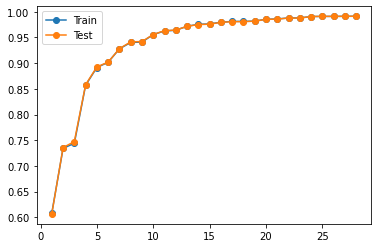

In [56]:
#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the Decision Tree model:{}%".format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test, y_pred))

print("MSE: %.4f" % mean_squared_error(y_test, y_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [57]:
#Performance evauation of KNN model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred1)
print("confusion matrix:")
print(cm)
print("accuracy of the KNN model:{}%".format(accuracy_score(y_test,y_pred1)*100))
print(classification_report(y_test, y_pred1))

print("MSE: %.4f" % mean_squared_error(y_test, y_pred1))

confusion matrix:
[[20280    34]
 [  391 21271]]
accuracy of the KNN model:98.98751667619592%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20314
           1       1.00      0.98      0.99     21662

    accuracy                           0.99     41976
   macro avg       0.99      0.99      0.99     41976
weighted avg       0.99      0.99      0.99     41976

MSE: 0.0101


In [58]:
#Performance evauation of SVM model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred2)
print("confusion matrix:")
print(cm)
print("Accuracy of the SVM model:{}%".format(accuracy_score(y_test,y_pred2)*100))
print(classification_report(y_test, y_pred2))

print("MSE: %.4f" % mean_squared_error(y_test, y_pred2))

confusion matrix:
[[20309     5]
 [ 2195 19467]]
Accuracy of the SVM model:94.75890985324948%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20314
           1       1.00      0.90      0.95     21662

    accuracy                           0.95     41976
   macro avg       0.95      0.95      0.95     41976
weighted avg       0.95      0.95      0.95     41976

MSE: 0.0524


In [59]:
#Performance evauation of NaiveBayes model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred3)
print("confusion matrix:")
print(cm)
print("Accuracy of the NaiveBayes model:{}%".format(accuracy_score(y_test,y_pred3)*100))
print(classification_report(y_test, y_pred3))

print("MSE: %.4f" % mean_squared_error(y_test, y_pred3))

confusion matrix:
[[ 4346 15968]
 [ 1971 19691]]
Accuracy of the NaiveBayes model:57.26367448065561%
              precision    recall  f1-score   support

           0       0.69      0.21      0.33     20314
           1       0.55      0.91      0.69     21662

    accuracy                           0.57     41976
   macro avg       0.62      0.56      0.51     41976
weighted avg       0.62      0.57      0.51     41976

MSE: 0.4274


In [60]:
#Performance evauation of Multilayer perceptron model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred4)
print("confusion matrix:")
print(cm)
print("Accuracy of the Multilayer perceptron model:{}%".format(accuracy_score(y_test,y_pred4)*100))
print(classification_report(y_test, y_pred4))

print("MSE: %.4f" % mean_squared_error(y_test, y_pred4))

confusion matrix:
[[20214   100]
 [  448 21214]]
Accuracy of the Multilayer perceptron model:98.69449209071851%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20314
           1       1.00      0.98      0.99     21662

    accuracy                           0.99     41976
   macro avg       0.99      0.99      0.99     41976
weighted avg       0.99      0.99      0.99     41976

MSE: 0.0131


|--- feature_25 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_14 <= 187.50
|   |   |   |--- feature_28 <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_28 >  5.50
|   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_22 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_14 >  187.50
|   |   |   |--- feature_16 <= 3.50
|   |   |   |   |--- feature_13 <= 167.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  167.50
|   |   |   |   |   |--- feature_13 <= 168.50
|   |   |   |   |   |   |--- feature_28 <= 6.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_28 >  6.50
|   |   |   |   |   |   |   |--- feature_28 <= 7.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_28 >  7.50
|   |   |   |   |   |   |   |   |--- feature_27 <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |---

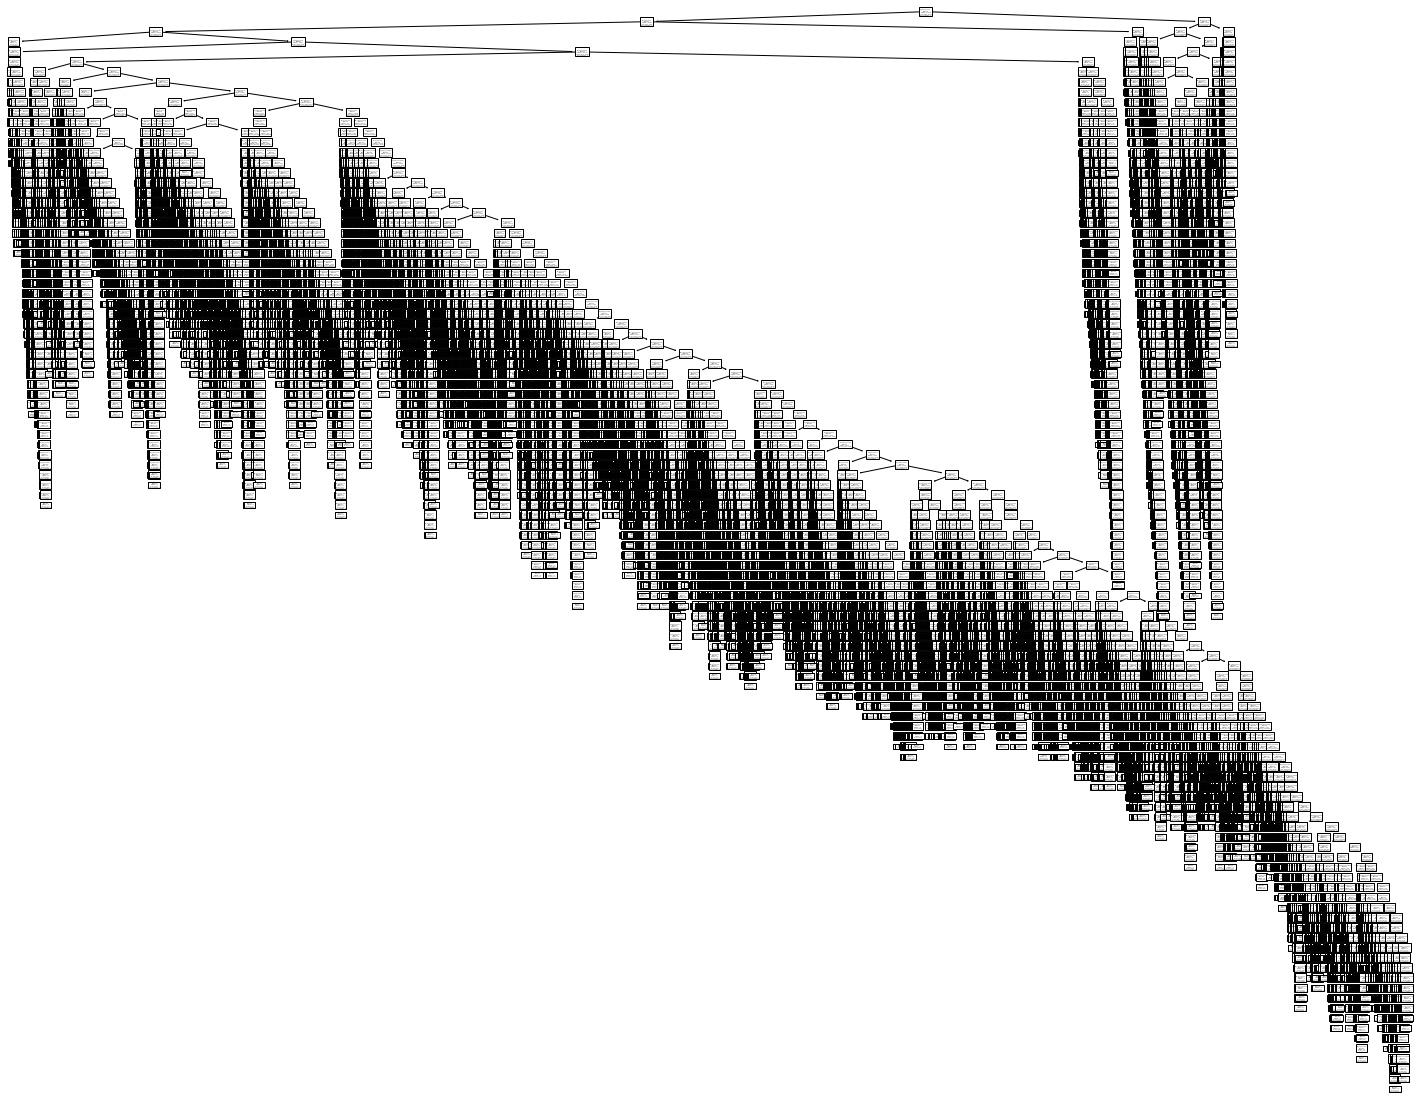

In [21]:
# Decision Tree Plot
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

X = dataset.iloc[:,:-3]
Y = dataset['Label_code']

clf = DecisionTreeClassifier(random_state=10)
model = clf.fit(X, Y)
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
dt= tree.plot_tree(clf, 
                   feature_names=dataset.columns,  
                   class_names=dataset.columns,
                   filled=True)

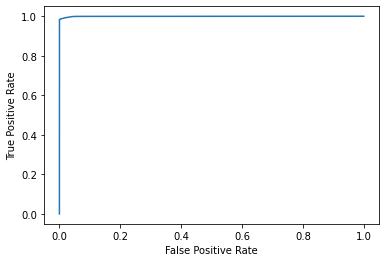

In [51]:
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=10)
model = clf.fit(x_train, y_train)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[0.00000000e+00 8.97420325e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.87416759e-02 1.08629180e-01 2.55082368e-03
 2.55659358e-03 1.08449870e-03 3.56753162e-04 5.71299570e-04
 5.53114652e-04 0.00000000e+00 1.14955580e-03 3.57136688e-04
 8.73823385e-04 5.69782009e-04 0.00000000e+00 3.90806272e-01
 3.91109749e-01 0.00000000e+00]


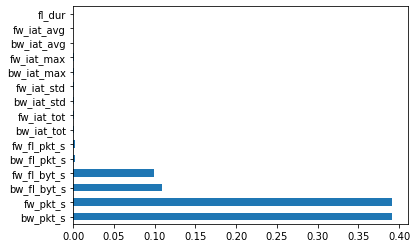

In [23]:
import pandas as pd
import numpy as np
X = dataset.iloc[:,:-3]
Y = dataset['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
'fl_dur','tot_fw_pk','tot_bw_pk','tot_l_fw_pkt','fw_pkt_l_max','fw_pkt_l_min','fw_pkt_l_avg','fw_pkt_l_std',
'bw_pkt_l_max','bw_pkt_l_min','bw_pkt_l_mean','bw_pkt_l_std','fw_fl_byt_s','bw_fl_byt_s','fw_fl_pkt_s',
'bw_fl_pkt_s','fw_iat_tot','fw_iat_avg','fw_iat_std','fw_iat_max',
'fw_iat_min','bw_iat_tot','bw_iat_avg','bw_iat_std','bw_iat_max','bw_iat_min','pkt_size_avg'


    fl_dur  tot_fw_pk  tot_bw_pk  tot_l_fw_pkt  fw_pkt_l_max  fw_pkt_l_min  \
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
..     ...        ...        ...           ...           ...           ...   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   
0        1          3          3           192            64            64   

    fw_pkt_l_avg  fw_pkt_l_std  bw_pkt_l_max  bw_pkt_l_min  ...

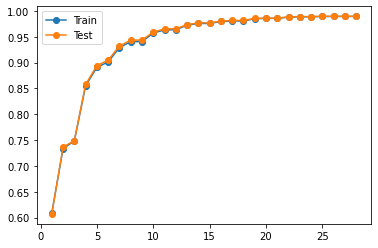

[2.58625224e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.54130694e-01 1.43559638e-01 1.80786423e-02 1.79437240e-03
 2.01556136e-03 8.20971538e-03 6.83138018e-06 2.17710429e-02
 1.78882278e-03 1.93415927e-03 7.95776007e-03 9.29706611e-06
 3.01294286e-01 3.11586654e-01 0.00000000e+00]


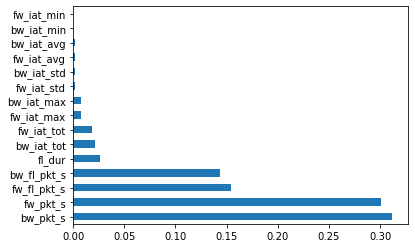

In [73]:
# Dropping important features from Dataset
user=os.getlogin()
df1 = read_csv('/home/'+user+'/Documents/Axiado-USB-Works/Reports/MLmodelanalysisofsmartattacksusingdifferenttechniques-allrelatedfiles/smartattack3_usingadjustedfeaturesofbenigndata/relatedcsvfiles/Plreports14users_attack_benign_data_integralval_unfiltered_copy.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)


df1.drop(['fw_fl_byt_s','bw_fl_byt_s'], axis=1, inplace=True)

#df1.drop(['fw_pkt_s','bw_pkt_s'], axis=1, inplace=True)

print(df1)

x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)


#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


import pandas as pd
import numpy as np
X = dataset.iloc[:,:-3]
Y = dataset['Label_code']
#from sklearn.ensemble import DecisionTreeClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [74]:


model_k = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
model_k.fit(x1_train,y1_train)

#prediction for Testing using KNN model
y1_predict = model_k.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_predict),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_predict.shape)
print(y1_train.shape)

#Performance evauation of KNN model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_predict)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_predict)*100))
print(classification_report(y1_test, y1_predict))
print("MSE: %.4f" % mean_squared_error(y1_test,y1_predict))


[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 1]]
(41976,)
(125926,)
confusion matrix:
[[20651     5]
 [  424 20896]]
accuracy of the model:98.97798742138365%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20656
           1       1.00      0.98      0.99     21320

    accuracy                           0.99     41976
   macro avg       0.99      0.99      0.99     41976
weighted avg       0.99      0.99      0.99     41976

MSE: 0.0102


In [75]:
model_N = GaussianNB()
model_N.fit(x1_train,y1_train)

#prediction for Testing using NaiveBayes
y_pred3 = model_N.predict(x1_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y1_test.reshape(len(y1_test),1)),1))


#Performance evauation of NaiveBayes model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y_pred3)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y_pred3)*100))
print(classification_report(y1_test, y_pred3))

print("MSE: %.4f" % mean_squared_error(y1_test, y_pred3))

[[1 0]
 [1 0]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 1]]
confusion matrix:
[[  837 19819]
 [  299 21021]]
accuracy of the model:52.072612921669524%
              precision    recall  f1-score   support

           0       0.74      0.04      0.08     20656
           1       0.51      0.99      0.68     21320

    accuracy                           0.52     41976
   macro avg       0.63      0.51      0.38     41976
weighted avg       0.62      0.52      0.38     41976

MSE: 0.4793


In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9), activation='relu', solver='adam', max_iter=1000)
mlp.fit(x1_train,y1_train)

#prediction for Testing using Multi Layer Perceptron
y_pred4 = mlp.predict(x1_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y1_test.reshape(len(y1_test),1)),1))

#Performance evauation of Multilayer perceptron model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y_pred4)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y_pred4)*100))
print(classification_report(y1_test, y_pred4))

print("MSE: %.4f" % mean_squared_error(y1_test, y_pred4))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [1 1]]
confusion matrix:
[[20651     5]
 [  452 20868]]
accuracy of the model:98.91128263769772%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20656
           1       1.00      0.98      0.99     21320

    accuracy                           0.99     41976
   macro avg       0.99      0.99      0.99     41976
weighted avg       0.99      0.99      0.99     41976

MSE: 0.0109


In [ ]:
plt.plot(dataset['pkt_size_avg'],dataset['Label_code'], color='red', marker='o')
plt.title('pkt_size_avg Vs Label_code', fontsize=10)
plt.xlabel('pkt_size_avg', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(dataset['bw_pkt_l_mean'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_pkt_l_mean Vs Label_code', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.xlabel('bw_pkt_l_mean', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(dataset['bw_pkt_l_max'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_pkt_l_max Vs Label_code', fontsize=10)
plt.xlabel('bw_pkt_l_max', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fw_iat_min'],dataset['Label_code'], color='red', marker='o')
plt.title('fw_iat_min Vs Label_code', fontsize=10)
plt.xlabel('fw_iat_min', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fw_iat_max'],dataset['Label_code'], color='red', marker='o')
plt.title('fw_iat_max Vs Label_code', fontsize=10)
plt.xlabel('fw_iat_max', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_iat_min'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_iat_min Vs Label_code', fontsize=10)
plt.xlabel('bw_iat_min', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fl_dur'],dataset['Label_code'], color='red', marker='o')
plt.title('fl_dur Vs Label_code', fontsize=10)
plt.xlabel('fl_dur', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_iat_tot'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_iat_tot Vs Label_code', fontsize=10)
plt.xlabel('bw_iat_tot', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fw_fl_pkt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('fw_fl_pkt_s Vs Label_code', fontsize=10)
plt.xlabel('fw_fl_pkt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fw_fl_byt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('fw_fl_byt_s Vs Label_code', fontsize=10)
plt.xlabel('fw_fl_byt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_fl_byt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_fl_byt_s Vs Label_code', fontsize=10)
plt.xlabel('bw_fl_byt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_pkt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_pkt_s Vs Label_code', fontsize=10)
plt.xlabel('bw_pkt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_fl_pkt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_fl_pkt_s Vs Label_code', fontsize=10)
plt.xlabel('bw_fl_pkt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_pkt_l_min'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_pkt_l_min Vs Label_code', fontsize=10)
plt.xlabel('bw_pkt_l_min', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['fw_pkt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('fw_pkt_s Vs Label_code', fontsize=10)
plt.xlabel('fw_pkt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(dataset['bw_pkt_s'],dataset['Label_code'], color='red', marker='o')
plt.title('bw_pkt_s Vs Label_code', fontsize=10)
plt.xlabel('bw_pkt_s', fontsize=10)
plt.ylabel('Label_code', fontsize=10)
plt.grid(True)
plt.show()

In [28]:
model_s =svm.SVC(gamma=0.001,C =0.1)
model_s.fit(x1_train,y1_train)

#prediction for Testing using SVM
y_pred2 = model_s.predict(x1_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y1_test.reshape(len(y1_test),1)),1))

#Performance evauation of SVM model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y_pred2)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y_pred2)*100))
print(classification_report(y1_test, y_pred2))

print("MSE: %.4f" % mean_squared_error(y1_test, y_pred2))





[[1 0]
 [1 0]
 [1 1]
 ...
 [1 0]
 [1 1]
 [1 0]]
confusion matrix:
[[    0 22058]
 [    0 21789]]
accuracy of the model:49.693251533742334%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22058
           1       0.50      1.00      0.66     21789

    accuracy                           0.50     43847
   macro avg       0.25      0.50      0.33     43847
weighted avg       0.25      0.50      0.33     43847

MSE: 0.5031


/home/chillara/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chillara/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chillara/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:



++







pping pkt_size_avg,bw_pkt_l_mean  features from Dataset
741
./8///0
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
df1.drop(['pkt_size_avg', 'bw_pkt_l_mean'], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max  features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max'], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max, bw_pkt_l_min  features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max', 'bw_pkt_l_min'], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max, bw_pkt_l_min, bw_pkt_s,fw_fl_byt_s   features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max', 'bw_pkt_l_min','bw_pkt_s','fw_pkt_s','fw_iat_min','bw_iat_min','fw_fl_byt_s','bw_fl_pkt_s','bw_fl_byt_s','fw_fl_pkt_s'], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max, bw_pkt_l_min, bw_pkt_s,fw_fl_byt_s   features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max', 'bw_pkt_l_min','bw_pkt_s','fw_pkt_s','fw_iat_min','bw_iat_min','fw_fl_byt_s','bw_fl_pkt_s','bw_fl_byt_s','fw_fl_pkt_s','fl_dur','fw_iat_max','bw_iat_tot'], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max, bw_pkt_l_min, bw_pkt_s,fw_fl_byt_s   features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=0)
df1 = df1.replace(np.nan, 0, regex=True)
print(df1)
#df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max', 'bw_pkt_l_min','bw_pkt_s','fw_pkt_s','fw_iat_min','bw_iat_min','fw_fl_byt_s','bw_fl_pkt_s','bw_fl_byt_s','fw_fl_pkt_s','fw_iat_avg','fw_iat_tot','fw_iat_std','bw_iat_avg','bw_iat_std','bw_iat_max','fl_dur','fw_iat_max','bw_iat_tot','tot_l_fw_pkt','tot_fw_pk','bw_pkt_l_std','tot_bw_pk','fw_pkt_l_max','fw_pkt_l_min','fw_pkt_l_avg',], axis=1, inplace=True)
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df1.iloc[:,:-3].values
y1 = df1['Label_code'].values
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.savefig('plot.pdf',bbox_inches='tight')
#plt.show()


In [ ]:
# Dropping pkt_size_avg,bw_pkt_l_mean,bw_pkt_l_max, bw_pkt_l_min, bw_pkt_s,fw_fl_byt_s   features from Dataset
df1 = read_csv('/home/chills/Documents/Axiado-USB-Works/consolplcsv/kstrdplfeaturesreport.csv', index_col=False)

df1 = df1.replace(np.nan, 0, regex=True)

df1.drop(['pkt_size_avg', 'bw_pkt_l_mean', 'bw_pkt_l_max', 'bw_pkt_l_min','bw_pkt_s','fw_pkt_s','fw_iat_min','bw_iat_min','fw_fl_byt_s','bw_fl_pkt_s','bw_fl_byt_s','fw_fl_pkt_s','fw_iat_avg','fw_iat_tot','fw_iat_std','bw_iat_avg','bw_iat_std','bw_iat_max','fl_dur','fw_iat_max','bw_iat_tot','tot_l_fw_pkt','tot_fw_pk','bw_pkt_l_std','tot_bw_pk','fw_pkt_l_max','fw_pkt_l_min','fw_pkt_l_avg','Unnamed: 0'], axis=1, inplace=True)




In [ ]:
#df.drop(['pkt_size_avg'], inplace = True, axis = 1) 
x1 = df2.iloc[:,:-3].values
y1 = df2['Label_code'].values
print(x1,len(x1))
print(y1,len(y1))


In [ ]:
# Splitting datset into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25,random_state =0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(x1_train,y1_train)

#prediction for Testing using Decision Tree
y1_pred = model.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y1_test.reshape(len(y1_test),1)),1))
print(y1_pred.shape)
print(y1_train.shape)

#Performance evauation of Decision Tree model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y1_test,y1_pred)
print("confusion matrix:")
print(cm)
print("accuracy of the model:{}%".format(accuracy_score(y1_test,y1_pred)*100))
print(classification_report(y1_test, y1_pred))

print("MSE: %.4f" % mean_squared_error(y1_test, y1_pred))

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 29)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model_D = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model_D.fit(x1_train, y1_train)
	# evaluate on the train dataset
	train_yhat = model_D.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model_D.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

X1 = df1.iloc[:,:-3]
Y1 = df1['Label_code']
print(X1)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1_train,y1_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()